# MAC0317/MAC5920
## Introdução ao Processamento de Sinais Digitais
## Capítulo 7: Bancos de Filtros

In [1]:
import math as m
import numpy as np
import matplotlib.pyplot as plt

## Seção 7.1: Visão geral

O objetivo deste capítulo é apresentar a teoria de **Wavelets** a partir da perspectiva de bancos de filtros.

Alguns pontos em comum com a representação de Fourier:
> - a transformada Wavelet também é linear, podendo ser representada por um par de equações
$$X = Wx\quad\quad\quad x=W^{-1}X;$$
> - os coeficientes $X_k$ também estão associados a uma família de funções básicas (wavelets);
> - a teoria pode ser estendida para sinais de duração infinita, bem como para sinais contínuos.

Algumas diferenças importantes:

> - a transformada parte do princípio que o conteúdo espectral do sinal varia no tempo;
> - cada wavelet básica (e portanto cada coeficiente $X_k$) possui simultaneamente localização temporal e características frequenciais;
> - a transformada possui complexidade computacional *linear* e não $\mathcal{O}(N\log N)$.

A ideia de banco de filtros não é tão distante da realidade de Fourier: cada coeficiente $X_k$ da DFT era definido por uma equação
$$X_k = (x,E_k) = \sum_{n=0}^{N-1}x_ne^{-i2\pi kn/N} = \sum_{n=0}^{N-1}x_ne^{i2\pi k(0-n)/N} = (x*E_k)_0,$$
ou seja, o coeficiente $X_k$ pode ser visto como obtido pela *filtragem* do sinal $x$ pelo filtro definido por $h=E_k$, cuja resposta em frequência é
$$\text{DFT}(E_k) = (0,\ldots,0,\overbrace{N}^{k},0,\ldots,0).$$

Nesse sentido, a transformada de Fourier pode ser vista como um banco de $N$ filtros $E_0,E_1,\ldots,E_{N-1}$, cada um dos quais "seleciona" exatamente o conteúdo de frequência $k$ do sinal $x$:
$$x\longrightarrow\begin{array}{|lll}
\longrightarrow&\fbox{$E_0$}&\longrightarrow\\
\longrightarrow&\fbox{$E_1$}&\longrightarrow\\
&\vdots&\\
\longrightarrow&\fbox{$E_{N-1}$}&\longrightarrow\\
\end{array}\left[\begin{array}{c}
\fbox{$X_0$}\\
\fbox{$X_1$}\\
\vdots\\
\fbox{$X_{N-1}$}\\
\end{array}\right]$$

### Seção 7.2.1: O banco de filtros de Haar de 1 estágio e 2 canais

Num primeiro momento, será mais conveniente apresentar a teoria de bancos de filtros sem nos preocuparmos com as "extremidades" do vetor, o que se torna muito mais fácil no contexto dos sinais bi-infinitos em $L^2(\mathbb{Z})$.

Consideraremos também bancos de filtros que utilizam apenas dois *canais* de separação em frequências de um sinal $x$, através de um filtro *passa-baixas* (*low-pass*) e outro filtro *passa-altas* (*high-pass*), associados respectivamente a vetores de coeficientes $l,h\in L^2(\mathbb{Z})$:

$$x\longrightarrow\begin{array}{|lll}
\longrightarrow&\fbox{$\ \ l\ \ $}&\longrightarrow\\
\longrightarrow&\fbox{$\ \ h\ \ $}&\longrightarrow
\end{array}\begin{array}{c}
\fbox{$l*x$}\\
\fbox{$h*x$}
\end{array}$$

O banco de filtros de Haar

$$x\longrightarrow\begin{array}{|lll}
\longrightarrow&\fbox{$\ \ l\ \ $}&\longrightarrow\\
\longrightarrow&\fbox{$\ \ h\ \ $}&\longrightarrow
\end{array}\begin{array}{c}
\fbox{$l*x$}\\
\fbox{$h*x$}
\end{array}$$

utiliza os filtros passa-baixas e passa-altas associados aos coeficientes

$$\begin{array}{lll}
l_0=\frac{1}{2},&l_1=\frac{1}{2},&l_r=0,\quad\text{c.c.}\\
h_0=\frac{1}{2},&h_1=-\frac{1}{2},&l_r=0,\quad\text{c.c.}
\end{array}$$

Esses são nossos velhos conhecidos *filtro da média* e *filtro da diferença normalizada*.

### Exemplo 7.1

Considere o sinal definido por

$$x(t) = \frac{1}{2}\text{sen}\left(2\pi(3)t\right)+ \frac{1}{2}\text{sen}\left(2\pi(49)t\right)$$ 

amostrado em $t\in[0,1)$ usando $N=128$ amostras.

Vamos observar a seguir os sinais obtidos pela aplicação dos filtros da média e da diferença a esse sinal:

$$\begin{array}{l}
(l*x)_k = \frac{1}{2}x_k+\frac{1}{2}x_{k-1},\\
(h*x)_k = \frac{1}{2}x_k-\frac{1}{2}x_{k-1}.\end{array}$$

In [2]:
N = 128
k = np.arange(N)
x = 0.5 * np.sin(2*m.pi*3*k/N) + 0.5 * np.sin(2*m.pi*49*k/N)
# passa-baixas
l = [ 0.5, 0.5 ];
xl = np.convolve(x,l)[:N] # recorta a convolução linear para manter o tamanho do vetor
# passa-altas
h = [ 0.5, -0.5 ]
xh = np.convolve(x,h)[:N]

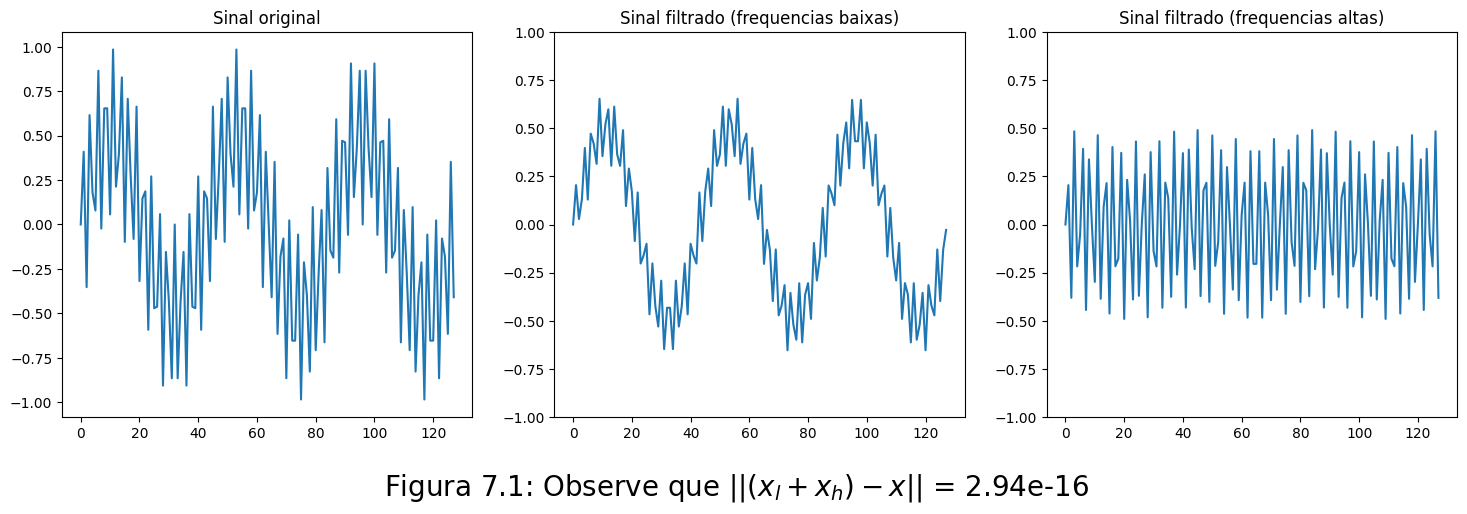

In [3]:
fig, ax = plt.subplots(1,3, figsize=(18,5))
ax[0].plot(k,x);ax[0].set_title("Sinal original")
ax[1].plot(k,xl);ax[1].set_ylim([-1, 1]);ax[1].set_title("Sinal filtrado (frequencias baixas)")
ax[2].plot(k,xh);ax[2].set_ylim([-1, 1]);ax[2].set_title("Sinal filtrado (frequencias altas)")
plt.suptitle(r"Figura 7.1: Observe que $||(x_l+x_h)-x||$ = {0:.2e}".format(np.linalg.norm(xh+xl-x)),y=0,fontsize=20);plt.show()

### Princípio da reconstrução perfeita

Observe que para os filtros de Haar, a soma das componentes $l*x$ e $h*x$ sempre fornece a reconstrução do sinal original. A propriedade $l*x+h*x=x$ decorre diretamente do fato de que $l+h=\delta$, onde $\delta_0=1$ e $\delta_r=0,\ \forall r\neq 0$, e portanto

$$l*x+h*x = (l+h)*x = \delta*x = x,$$

já que $\delta$ é o elemento neutro da convolução.

Gostaríamos de manter esse princípio válido, ou seja, de que é possível reconstruir exatamente o sinal $x$ a partir dos sinais filtrados $l*x$ e $h*x$, e ao mesmo tempo explorar certas redundâncias presentes nestes últimos sinais.

Considere o sinal original
$$x = \left[\begin{array}{c}\vdots\\x_{-2}\\x_{-1}\\\fbox{$x_0$}\\x_1\\x_2\\\vdots\end{array}\right]$$
e os sinais filtrados pelos filtros passa-baixas e passa-altas
$$l*x = \frac{1}{2}\left[\begin{array}{c}\vdots\\x_{-2}+x_{-3}\\x_{-1}+x_{-2}\\\fbox{$x_0+x_{-1}$}\\x_1+x_0\\x_2+x_1\\\vdots\end{array}\right],\quad\quad\quad h*x = \frac{1}{2}\left[\begin{array}{c}\vdots\\x_{-2}-x_{-3}\\x_{-1}-x_{-2}\\\fbox{$x_0-x_{-1}$}\\x_1-x_0\\x_2-x_1\\\vdots\end{array}\right].$$

Indicaremos nesses e nos próximos exemplos os índice $n=0$ através de caixas para facilitar o alinhamento dos sinais.

Há muita redundância nos sinais $l*x$ e $h*x$. Lembrando que

$$(l*x)_k = \frac{1}{2}x_k+\frac{1}{2}x_{k-1}\quad\text{e}\quad
(h*x)_k= \frac{1}{2}x_k-\frac{1}{2}x_{k-1}$$

podemos ver que a partir do conhecimento das duas amostras acima, correspondentes a um único instante $k$, é possível "reconstruir" tanto as amostras $x_k$ quanto $x_{k-1}$:

$$\begin{array}{ll}
x_k & = (l*x)_k+(h*x)_k\\
x_{k-1} & = (l*x)_k-(h*x)_k.
\end{array}$$

Assim, não seria necessário conhecer $(l*x)_{k-1}$ $(h*x)_{k-1}$ para obter $x_{k-1}$, sendo possível "descartar" metade dos vetores $l*x$ e $h*x$ e ainda assim preservar o princípio da reconstrução perfeita.

### Construção dos vetores de aproximação e detalhe

Usaremos um operador de *subamostragem* para construir os vetores $X_l$ e $X_h$ que denominaremos de *coeficientes de aproximação e de detalhes*.

**Definição 7.2.1:** O operador de subamostragem (*downsampling*) $D:L^2(\mathbb{Z})\mapsto L^2(\mathbb{Z})$ é definido por

$$D:(\ldots,x_{-2},x_{-1},\fbox{$x_0$},x_1,x_2,\ldots)\mapsto(\ldots,x_{-2},\fbox{$x_0$},x_2,\ldots)$$

ou equivalentemente por $(D(x))_k = x_{2k}$.

Note que esse operador descarta todos os coeficientes ímpares, e corresponde a uma *contração temporal* do sinal.

**Observe** também que esse operador é linear, ou seja, satisfaz

$$D(x+y)=D(x)+D(y)\quad\quad\text{e}\quad\quad D(\alpha x) = \alpha D(x),$$

Os coeficientes de aproximação e detalhes pelo banco de filtros de Haar para um sinal $x$ serão definidos respectivamente por

$$X_l=D(l*x) = \frac{1}{2}\left[\begin{array}{c}\vdots\\x_{-2}+x_{-3}\\\fbox{$x_0+x_{-1}$}\\x_2+x_1\\\vdots\end{array}\right],\quad\quad\quad X_h = D(h*x) = \frac{1}{2}\left[\begin{array}{c}\vdots\\x_{-2}-x_{-3}\\\fbox{$x_0-x_{-1}$}\\x_2-x_1\\\vdots\end{array}\right].$$

Note que $X_l$ é uma versão *suavizada* (através do filtro passa-baixas) e *concentrada* (pelo operador de subamostragem) do sinal original; analogamente, $X_h$ concentra o conteúdo de alta frequência do sinal original.

### A Transformada do banco de filtros de Haar em $L^2(\mathbb{Z})$

O processo descrito até aqui pode ser ilustrado pelo diagrama

$$x\longrightarrow\begin{array}{|l|}
\longrightarrow\fbox{$\ \ l_a\,\ \ $}\longrightarrow \,l_a*x\longrightarrow\fbox{$\ \ D\ \ $}\longrightarrow \,D(l_a*x)\,\longrightarrow\\
\longrightarrow\fbox{$\ \ h_a\ \ $}\longrightarrow h_a*x\longrightarrow\fbox{$\ \ D\ \ $}\longrightarrow D(h_a*x)\longrightarrow
\end{array}\longrightarrow\left[\begin{array}{c}
\fbox{$X_l$}\\
\fbox{$X_h$}
\end{array}\right]$$

onde os filtros passa-altas e passa-baixas foram renomeados como $l_a$ e $h_a$ para indicar que pertencem à etapa de *análise*.

Consideraremos a transformação $W:L^2(\mathbb{Z})\mapsto L^2(\mathbb{Z})\times L^2(\mathbb{Z})$ definida por

$$W(x)\mapsto(X_l,X_h)$$

como sendo a transformada de Haar em $L^2(\mathbb{Z})$. Sua *linearidade* segue diretamente das linearidades da convolução e da subamostragem.

A figura a seguir ilustra a decomposição do último sinal de exemplo $x$ em $X_l$ e $X_h$.

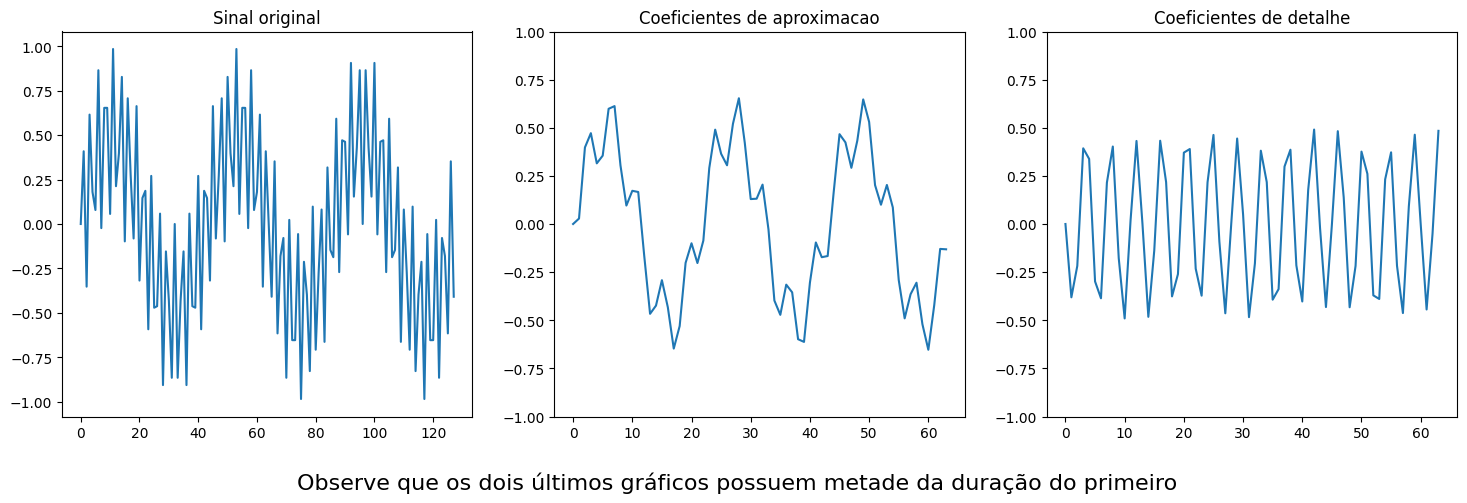

In [4]:
fig,ax = plt.subplots(1,3, figsize=(18,5))
ax[0].plot(k,x);ax[0].set_title("Sinal original")
ax[1].plot(xl[0:N:2]);ax[1].set_ylim([-1, 1]);ax[1].set_title("Coeficientes de aproximacao")
ax[2].plot(xh[0:N:2]);ax[2].set_ylim([-1, 1]);ax[2].set_title("Coeficientes de detalhe");
plt.suptitle(r"Observe que os dois últimos gráficos possuem metade da duração do primeiro",y=0,fontsize=16);plt.show()

### Invertendo a transformada de Haar de 1 estágio

O nosso objetivo agora é verificar que ainda é possível reconstruir o sinal original $x$ a partir dos coeficientes de aproximação $X_l$ e de detalhes $X_h$, apesar do descarte promovido pela subamostragem. Essa reconstrução começa restaurando a escala de tempo do sinal original.

**Definição 7.2.2:** O operador de superamostragem (*upsampling*) $U:L^2(\mathbb{Z})\mapsto L^2(\mathbb{Z})$ é definido por

$$U:(\ldots,x_{-1},\fbox{$x_{ 0}$},x_{ 1},\ldots)\mapsto(\ldots,0,x_{-1},0,\fbox{$x_{ 0}$},0,x_{ 1},0,\ldots)$$

ou equivalentemente por $(U(x))_k = \left\{\begin{array}{ll}x_{k/2},&\text{se $k$ é par,}\\0,&\text{se $k$ é ímpar}\end{array}\right.$

**Observe** também que esse operador também é linear, ou seja, satisfaz $U(x+y)=U(x)+U(y)$ e $U(\alpha x) = \alpha U(x)$.

Aplicando o operador de superamostragem nos vetores $X_l$ e $X_h$ obtemos

$$U(X_l) = \frac{1}{2}\left[\begin{array}{c}\vdots\\0\\x_{-2}+x_{-3}\\0\\\fbox{$x_0+x_{-1}$}\\0\\x_2+x_1\\0\\\vdots\end{array}\right],\quad\quad\quad U(X_h) = \frac{1}{2}\left[\begin{array}{c}\vdots\\0\\x_{-2}-x_{-3}\\0\\\fbox{$x_0-x_{-1}$}\\0\\x_2-x_1\\0\\\vdots\end{array}\right].$$

Para "preenchermos" as lacunas dos vetores $U(X_l)$ e $U(X_h)$ de forma a permitir a reconstrução de $x$, aplicaremos convoluções com novos filtros, também passa-baixas e passa-altas, que sejam apropriados à reconstrução. Os filtros dessa última etapa são chamados de *filtros de síntese*, e denotados por $l_s$ (passa-baixas) e $h_s$ (passa-altas).

No banco de filtros de Haar, os filtros de síntese são dados por

$$\begin{array}{lll}
(l_s)_{-1}=1,&(l_s)_0=1,&(l_s)_r=0,\quad\text{c.c.}\\
(h_s)_{-1}=-1,&(h_s)_0=1,&(l_s)_r=0,\quad\text{c.c.}
\end{array}$$

ou equivalentemente

$$\begin{array}{l}
(l_s*x)_k=x_k+x_{k+1}\\
(h_s*x)_k=x_k-x_{k+1}
\end{array}$$

Observe que estes são pequenas variantes dos filtros da média e da diferença originais, porém com escala diferente e "espelhados", ou seja, combinam cada amostra com a amostra seguinte, ao invés da anterior (por isso são filtros não-causais).

Aplicando os filtros de síntese aos vetores $U(X_l)$ e $U(X_h)$ para produzir $v_l=l_s*U(X_l)$ e $v_h = h_s*U(X_h)$, obtemos

$$v_l = \frac{1}{2}\left[\begin{array}{c}\vdots\\x_{-2}+x_{-3}\\x_{-2}+x_{-3}\\x_0+x_{-1}\\\fbox{$x_0+x_{-1}$}\\x_2+x_1\\x_2+x_1\\x_4+x_3\\\vdots\end{array}\right],\quad\quad\quad v_h = \frac{1}{2}\left[\begin{array}{c}\vdots\\-x_{-2}+x_{-3}\\x_{-2}-x_{-3}\\-x_0+x_{-1}\\\fbox{$x_0-x_{-1}$}\\-x_2+x_1\\x_2-x_1\\-x_4+x_3\\\vdots\end{array}\right].$$

Em geral, temos

$$(v_l)_k=\left\{\begin{array}{ll}\frac{1}{2}(x_k+x_{k-1}),&\text{se $k$ é par,}\\\frac{1}{2}(x_{k+1}+x_k),&\text{se $k$ é ímpar,}\end{array}\right.\quad\quad(v_h)_k=\left\{\begin{array}{ll}\frac{1}{2}(x_k-x_{k-1}),&\text{se $k$ é par,}\\\frac{1}{2}(-x_{k+1}+x_k),&\text{se $k$ é ímpar.}\end{array}\right.$$

de onde se vê que

$$(v_l)_k+(v_h)_k=\left\{\begin{array}{ll}\frac{1}{2}(x_k+x_{k-1})+\frac{1}{2}(x_k-x_{k-1}),&\text{se $k$ é par,}\\\frac{1}{2}(x_{k+1}+x_k)+\frac{1}{2}(-x_{k+1}+x_k),&\text{se $k$ é ímpar,}\end{array}\right\}=x_k.$$

Ou ainda:

$$v_l+v_h = \frac{1}{2}\left[\begin{array}{c}\vdots\\x_{-2}+x_{-3}\\x_{-2}+x_{-3}\\x_0+x_{-1}\\\fbox{$x_0+x_{-1}$}\\x_2+x_1\\x_2+x_1\\x_4+x_3\\\vdots\end{array}\right]+\frac{1}{2}\left[\begin{array}{c}\vdots\\-x_{-2}+x_{-3}\\x_{-2}-x_{-3}\\-x_0+x_{-1}\\\fbox{$x_0-x_{-1}$}\\-x_2+x_1\\x_2-x_1\\-x_4+x_3\\\vdots\end{array}\right]
=\left[\begin{array}{c}\vdots\\x_{-3}\\x_{-2}\\x_{-1}\\x_0\\x_1\\x_2\\x_3\\\vdots\end{array}\right].$$

Esse processo pode ser ilustrado pelo diagrama da transformada de síntese (inversa):

$$x\longleftarrow\begin{array}{l|}
\quad\overbrace{\ \ v_l\ \ }^{\small=l_s*U(X_l)}\longleftarrow\fbox{$\ \ l_s\ \ $}\longleftarrow U(X_l)\longleftarrow\fbox{$\ \ U\ \ $}\longleftarrow\\
\quad\swarrow\\
\bigoplus\\
\quad\nwarrow\\
\quad\overbrace{\ \ v_s\ \ }^{\small=h_s*U(X_h)}\longleftarrow\fbox{$\ \ h_s\ \ $}\longleftarrow U(X_h)\longleftarrow\fbox{$\ \ U\ \ $}\longleftarrow
\end{array}\longleftarrow\left[\begin{array}{c}
\fbox{$X_l$}\\
\fbox{$X_h$}
\end{array}\right]$$

Observe a estrutura espelhada em relação ao diagrama da transformada direta (análise).

### Observação 7.1: Causalidade e atrasos

Os filtros de síntese $l_s$ e $h_s$ *não são causais*, o que pode dificultar a aplicação da transformada inversa em certos contextos (por exemplo no processamento em tempo real).

Uma alternativa para tornar todos os filtros causais é introduzir atrasos propositais na cadeia de processamento. Considere o operador de *atraso* $S:L^2(\mathbb{Z})\mapsto L^2(\mathbb{Z})$ definido por $(S(x))_k=x_{k-1}$, ou seja,
$$\begin{array}{lllllll}
\cdots&x_{-2}&x_{-1}&\fbox{$x_0$}&x_1&x_2&\cdots\\
&\downarrow&\downarrow&\downarrow&\downarrow&\downarrow\\
\cdots&x_{-3}&x_{-2}&\fbox{$x_{-1}$}&x_0&x_1&\cdots\end{array}$$

Substituindo os filtros não-causais $l_s$ e $h_s$ pelos filtros causais $S(l_s)$ e $S(h_s)$ teremos na saída do processo de síntese o sinal

$$S(l_s)*U(X_l)+S(h_s)*U(X_h) = S(l_s*U(X_l)+h_s*U(X_h)) = S(x).$$

A propriedade $S(v)*w=S(v*w)$ é um caso particular do exercício 7.7.

### Exemplo 7.2

Considere o sinal definido por

$$x(t) = \left\{\begin{array}{ll}
\sin(2\pi 12 t),&0\le t<t_1\\
0.8,&t_1\le t<t_2\\
0.3,&t_2\le t<t_3\\
0,&t_3\le t<1
\end{array}\right.$$

onde $0<t_1<t_2<t_3<1$ formam uma partição arbitrária do intervalo $[0,1]$.

Construiremos a seguir os coeficientes de aproximação e detalhes desse sinal $x$. Observe como os coeficientes de aproximação possuem o mesmo perfil do sinal original, e como os coeficientes de detalhes guardam informações importantes para a reconstrução (por exemplo os pontos de descontinuidade do sinal original).

In [5]:
N = 1024
# sinal com vários trechos independentes
x = np.zeros(1024)
x[0:350] = np.sin(2 * m.pi * 12 *  np.arange(0, 1, 1/N)[:350]) 
x[350:500] = 0.8 * np.ones(150)
x[500:800] = 0.3 * np.ones(300)

# passa-baixas
l = [0.5, 0.5]
xl = np.convolve(x, l)
# passa-altas
h = [0.5, -0.5]
xh = np.convolve(x,h)

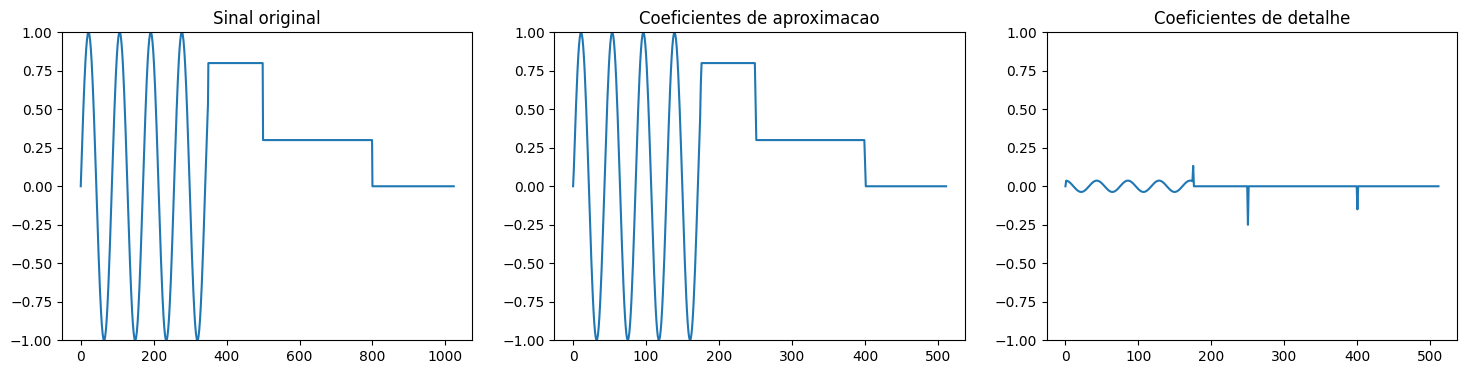

In [6]:
fig, ax = plt.subplots(1,3, figsize=(18,4))
ax[0].plot(x);ax[0].set_ylim([-1, 1]);ax[0].set_title("Sinal original")
ax[1].plot(xl[0:N:2]);ax[1].set_ylim([-1, 1]);ax[1].set_title("Coeficientes de aproximacao")
ax[2].plot(xh[0:N:2]);ax[2].set_ylim([-1, 1]);ax[2].set_title("Coeficientes de detalhe");plt.show()

### Continuação do exemplo 7.2: compressão

Lembrando que os coeficientes de aproximação $X_l$ da transformada de Haar correspondem a uma versão suavizada e subamostrada do sinal original $x$, podemos obter uma compressão "fácil" de 50% simplesmente descartando os coeficientes de detalhes $X_h$ na representação compactada, e ressintetizando o sinal preenchendo os coeficientes de detalhes faltantes com $X_h=0$.

Na figura a seguir ilustramos a aplicação dessa compressão ao sinal do exemplo 7.2, contrastando com o resultado de aplicar um princípio similar de compressão à DFT(x), descartando 50% dos coeficientes de menor amplitude.

Observe os erros relativos indicados nos gráficos, e compare-os com sua impressão subjetiva da qualidade dos sinais reconstruídos. Note as diferenças entre as imagens na porção senoidal e nos trechos constantes.

In [7]:
# Reconstrução usando transformada de Haar, zerando o vetor xh:
Uxl = np.zeros(N+1)
Uxl[0:N+1:2] = xl[0:N+1:2]
vl = np.convolve(Uxl,[ 1, 1 ])[1:N+1]

# Reconstrução usando DFT, mantendo 50% dos coeficientes (mais altos)
X = np.fft.fft(x[0:N])

Xcompactado = np.copy(X)
limiar = np.median(abs(X))
Xcompactado[abs(Xcompactado) < limiar] = 0
xnovo = np.real(np.fft.ifft(Xcompactado))

# Calcula erro relativo da reconstrução
def distortion(x,l):                                                            
    return np.linalg.norm(x-l)/ np.linalg.norm(x)

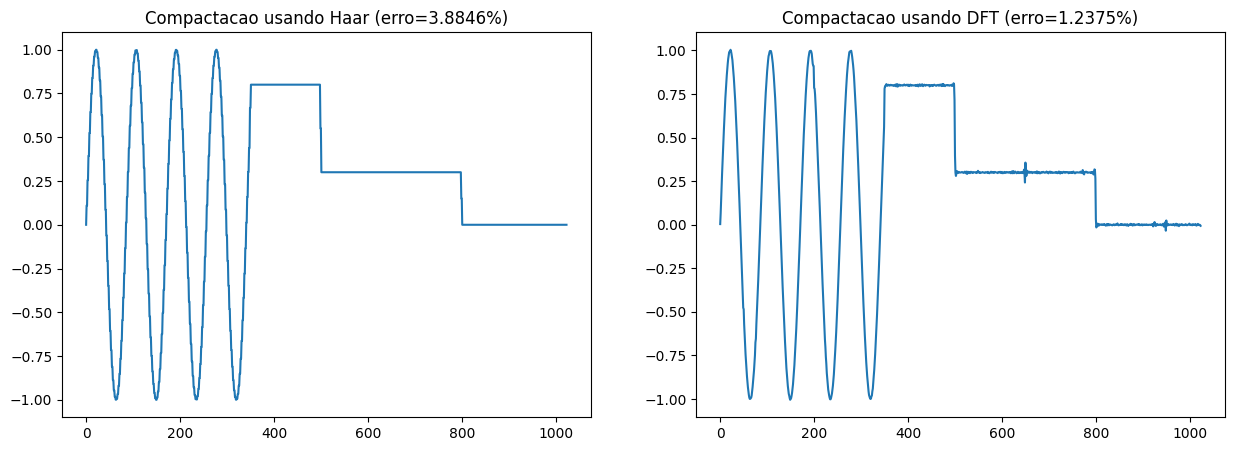

In [8]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].plot(vl);ax[0].set_title(r"Compactacao usando Haar (erro={0:.4f}%)".format(100*distortion(x[0:N], vl)))
ax[1].plot(xnovo);ax[1].set_title(r"Compactacao usando DFT (erro={0:.4f}%)".format(100*distortion(x[0:N], xnovo)))
plt.show()

### Outro exemplo de compressão do mesmo sinal, mantendo 75% dos coeficientes

No caso de Haar, eliminaremos 50% dos coeficientes de $X_h$ (os de menor amplitude), o que corresponde a descartar 25% do vetor $(X_l,X_h)$.

No caso da DFT, eliminaremos 25% dos coeficientes da DFT(x) (os de menor amplitude).

Pode-se ver que a compressão por Haar nesse caso não acarreta nenhuma perda na reconstrução, provavelmente devido ao fato de que o vetor $X_h$ já possuia muitos zeros, ao passo que a melhora no desempenho da compressão por Fourier não elimina os artefatos nos trechos constantes do sinal.

In [9]:
# ao invés de anular o vetor xh,
# vamos manter 50% dos coeficientes de xh (os mais altos).
# A representação terá no total 75% do tamanho de x
# (50% correspondente a xl e 25% correspondente a xh).

xhnovo = xh.copy()
limiar = np.median(abs(xh))
xhnovo[abs(xhnovo) < limiar] = 0
Uxh = np.zeros(N+1)
Uxh[0:N+1:2] = xhnovo[0:N+1:2]
vh = np.convolve(Uxh,[ -1, 1 ])[1:N+1]

# Reconstrução por FFT mantendo 75% dos coeficientes (mais altos)
limiar = np.percentile(abs(X).T, 25)
Xcompactado = X.copy()
Xcompactado[abs(Xcompactado) < limiar] = 0
xnovo = np.real(np.fft.ifft(Xcompactado))

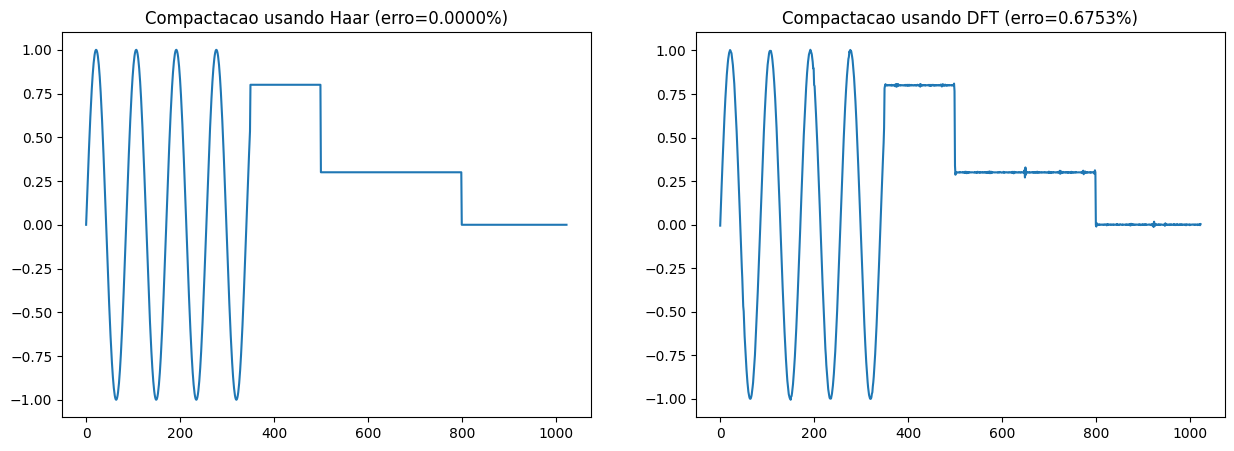

In [10]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].plot(vl+vh);ax[0].set_title(r"Compactacao usando Haar (erro={0:.4f}%)".format(100*distortion(x[0:N], vl+vh)))
ax[1].plot(xnovo);ax[1].set_title(r"Compactacao usando DFT (erro={0:.4f}%)".format(100*distortion(x[0:N], xnovo)))
plt.show()